In [5]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
iris=load_iris()

In [7]:
print(iris.keys())         
print(iris.data.shape)     
print(iris.feature_names)  
print(iris.target_names) 

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [8]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
species=[]
for i in range(len(iris.target)):
    if (iris.target)[i]==0:
        species.append("setosa")
    elif (iris.target)[i]==1:
        species.append("versicolor")
    else:
        species.append("virginica")
df["species"]=species
    
        



In [9]:

display(df)
#explain regression and classification

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [10]:
x=iris.data
y=iris.target
sl=(x.T)[0]
sw=(x.T)[1]
pl=(x.T)[2]
pw=(x.T)[3]

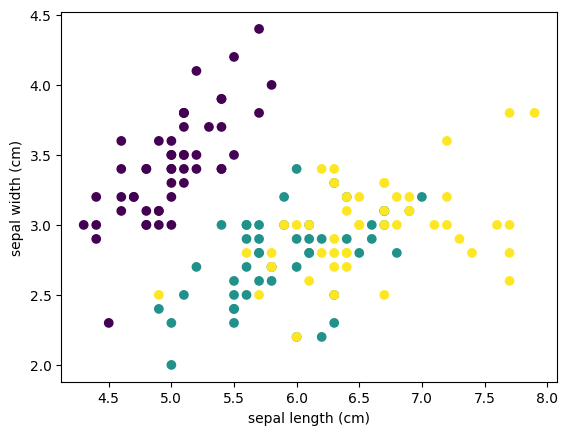

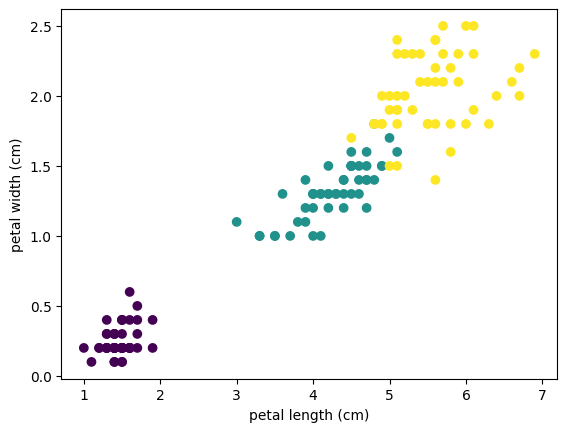

In [11]:
sln=iris.feature_names[0]
swn=iris.feature_names[1]
pln=iris.feature_names[2]
pwn=iris.feature_names[3]
plt.scatter(sl,sw,c=y)
plt.xlabel(sln)
plt.ylabel(swn)
plt.show()
plt.scatter(pl,pw,c=y)
plt.xlabel(pln)
plt.ylabel(pwn)
plt.show()



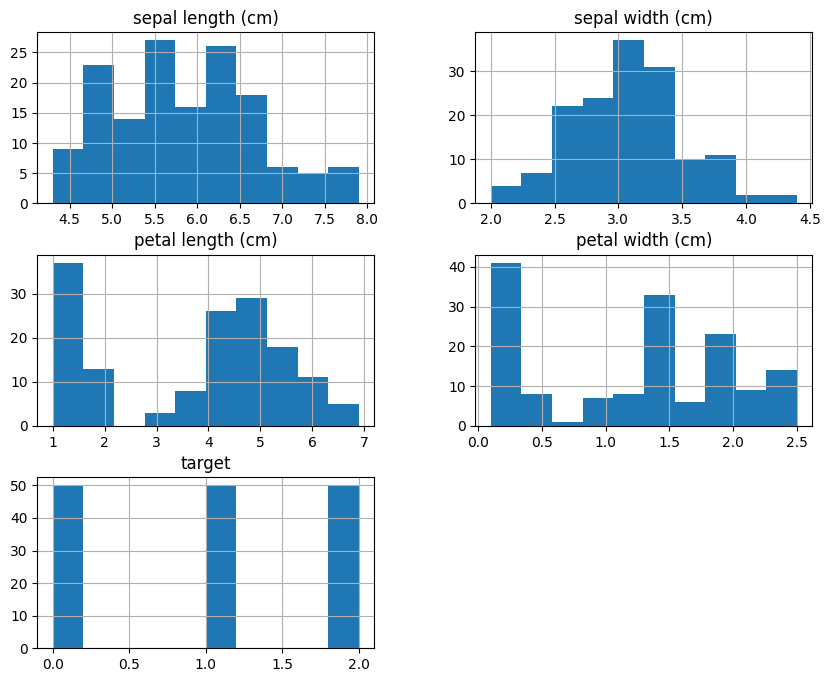

In [12]:
df.hist(figsize=(10,8))
plt.show()

In [13]:
#feature enginerring and overfitting

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.5,random_state=0)#%75 %25

In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
scaled_x_train=scaler.transform(x_train)
scaled_x_test=scaler.transform(x_test)#mean=0 standart deviation=1 x-mean/sd cross validation yapmayı unutma DATA LEAKAGE ENGELLEME

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score,precision_score,f1_score
model=LogisticRegression()#100 parametic
model.fit(scaled_x_train,y_train)
y_pred1=model.predict(scaled_x_test)
print("Accuracy score: ",accuracy_score(y_test,y_pred1)*100,"precision score:",precision_score(y_test,y_pred1,average='macro')*100 ,'\n',
        "recall score:",recall_score(y_test,y_pred1,average='macro')*100,"f1 score:",f1_score(y_test,y_pred1,average='macro')*100)


Accuracy score:  92.0 precision score: 92.80303030303031 
 recall score: 92.22222222222221 f1 score: 92.42636746143057


In [34]:
from sklearn import neighbors
classifier=neighbors.KNeighborsClassifier()#5 non parametic
classifier.fit(scaled_x_train,y_train)
y_pred2=classifier.predict(scaled_x_test)
print("Accuracy score: ",accuracy_score(y_test,y_pred2)*100,"precision score:",precision_score(y_test,y_pred2,average='macro')*100 ,'\n',
        "recall score:",recall_score(y_test,y_pred2,average='macro')*100,"f1 score:",f1_score(y_test,y_pred2,average='macro')*100)


Accuracy score:  94.66666666666667 precision score: 95.35984848484848 
 recall score: 94.72222222222223 f1 score: 94.95091164095372


In [35]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(scaled_x_train,y_train)
y_pred3=tree.predict(scaled_x_test)
print("Accuracy score: ",accuracy_score(y_test,y_pred3)*100,"precision score:",precision_score(y_test,y_pred3,average='macro')*100 ,'\n',
        "recall score:",recall_score(y_test,y_pred3,average='macro')*100,"f1 score:",f1_score(y_test,y_pred3,average='macro')*100)


Accuracy score:  96.0 precision score: 96.40018700327255 
 recall score: 96.11111111111111 f1 score: 96.23299616323683


In [38]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(scaled_x_train, y_train)
y_pred4=svm.predict(scaled_x_test)
print("Accuracy score: ",accuracy_score(y_test,y_pred4)*100,"precision score:",precision_score(y_test,y_pred4,average='macro')*100 ,'\n',
        "recall score:",recall_score(y_test,y_pred4,average='macro')*100,"f1 score:",f1_score(y_test,y_pred4,average='macro')*100)


Accuracy score:  92.0 precision score: 94.44444444444446 
 recall score: 91.66666666666666 f1 score: 92.20779220779221


In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(
    neighbors.KNeighborsClassifier(),  
    param_grid,
    cv=5#cross validation
)
grid_search.fit(scaled_x_train,y_train)
y_pred5=grid_search.predict(scaled_x_test)
cm=confusion_matrix(y_pred5,y_test)
print(grid_search.best_params_)
print("Accuracy score: ",accuracy_score(y_test,y_pred5)*100,"precision score:",precision_score(y_test,y_pred5,average='macro')*100 ,'\n',
        "recall score:",recall_score(y_test,y_pred5,average='macro')*100,"f1 score:",f1_score(y_test,y_pred5,average='macro')*100)
print(cm)
#setosa versicolor virginica

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Accuracy score:  92.0 precision score: 93.4313725490196 
 recall score: 91.94444444444444 f1 score: 92.32954545454545
[[21  0  0]
 [ 0 29  5]
 [ 0  1 19]]
